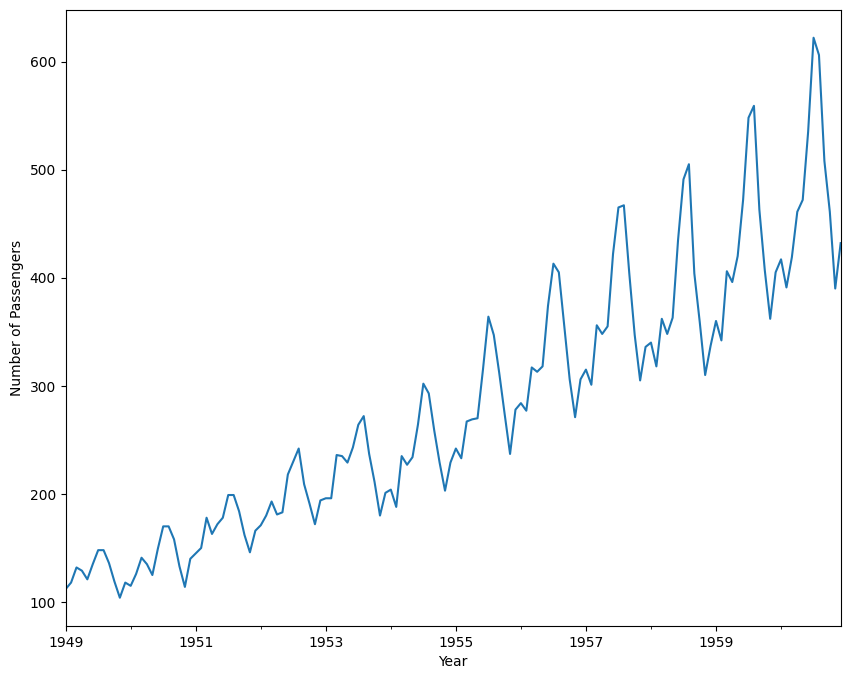

KeyError: 'lower 90%'

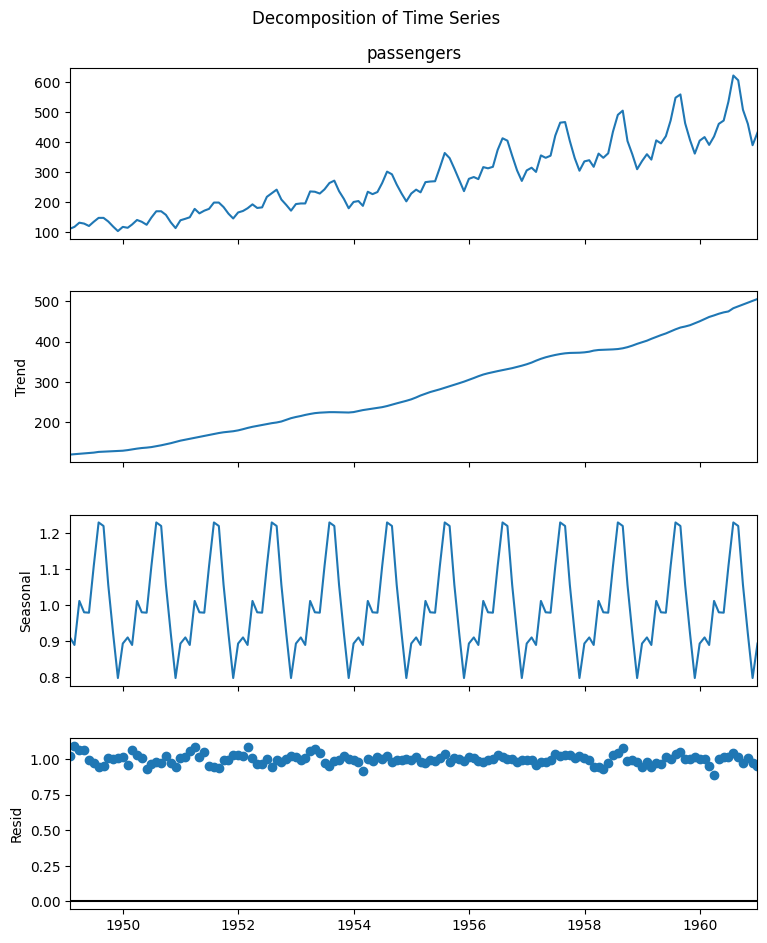

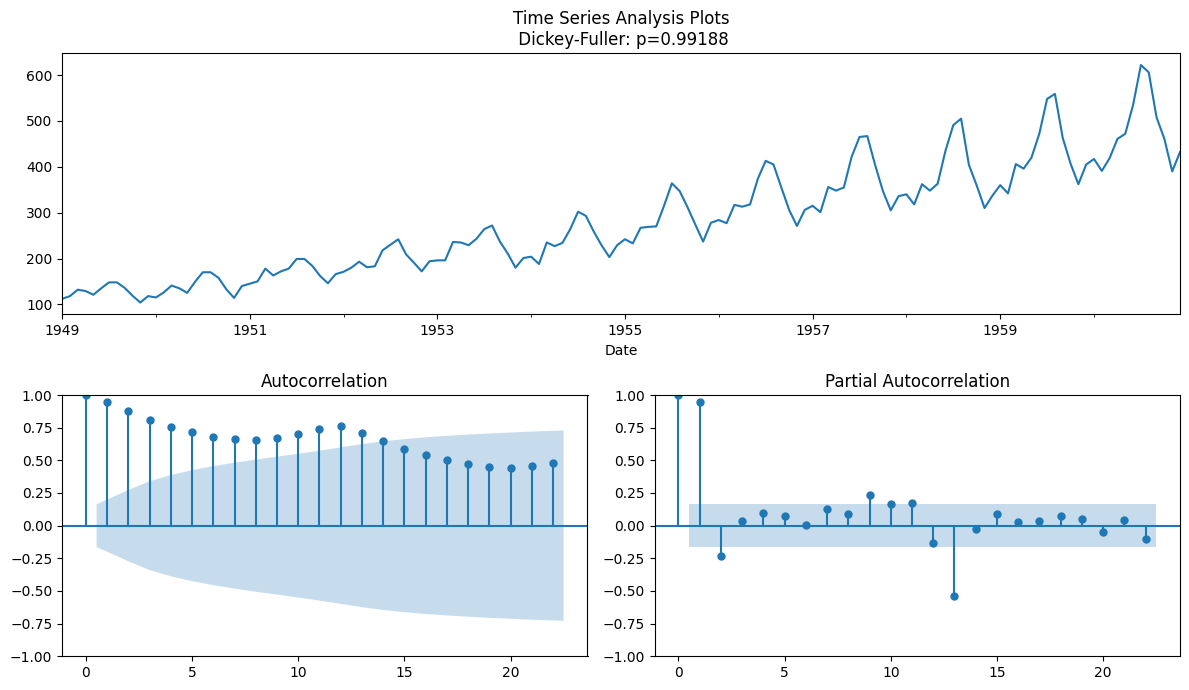

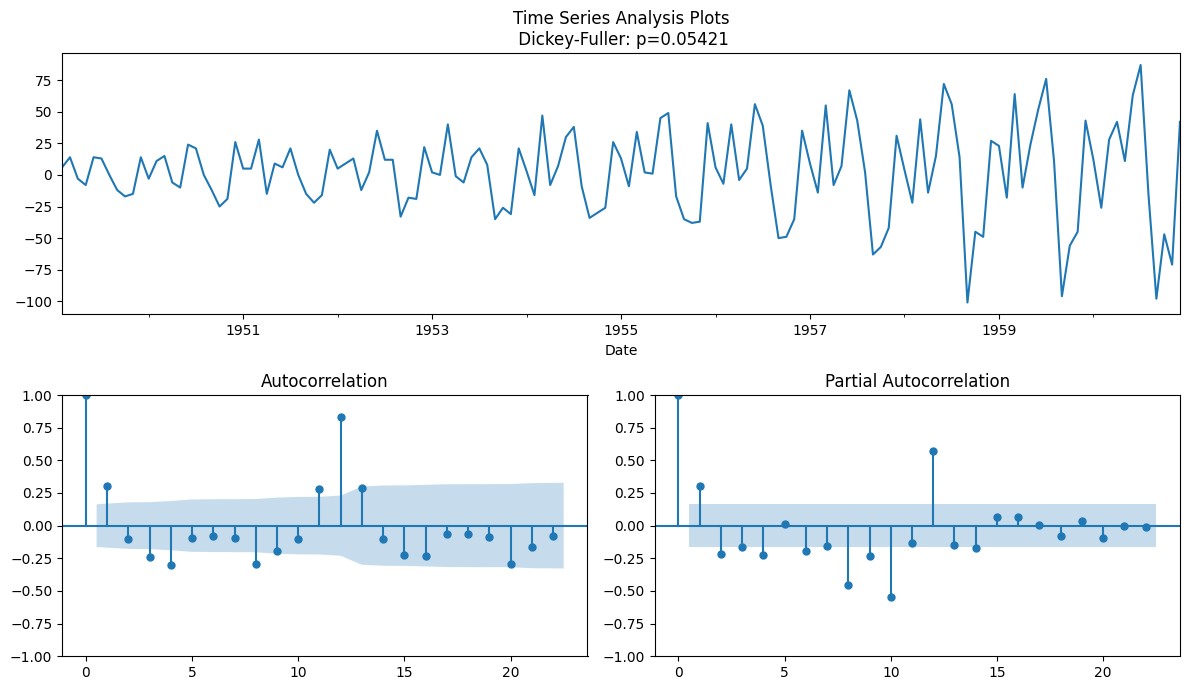

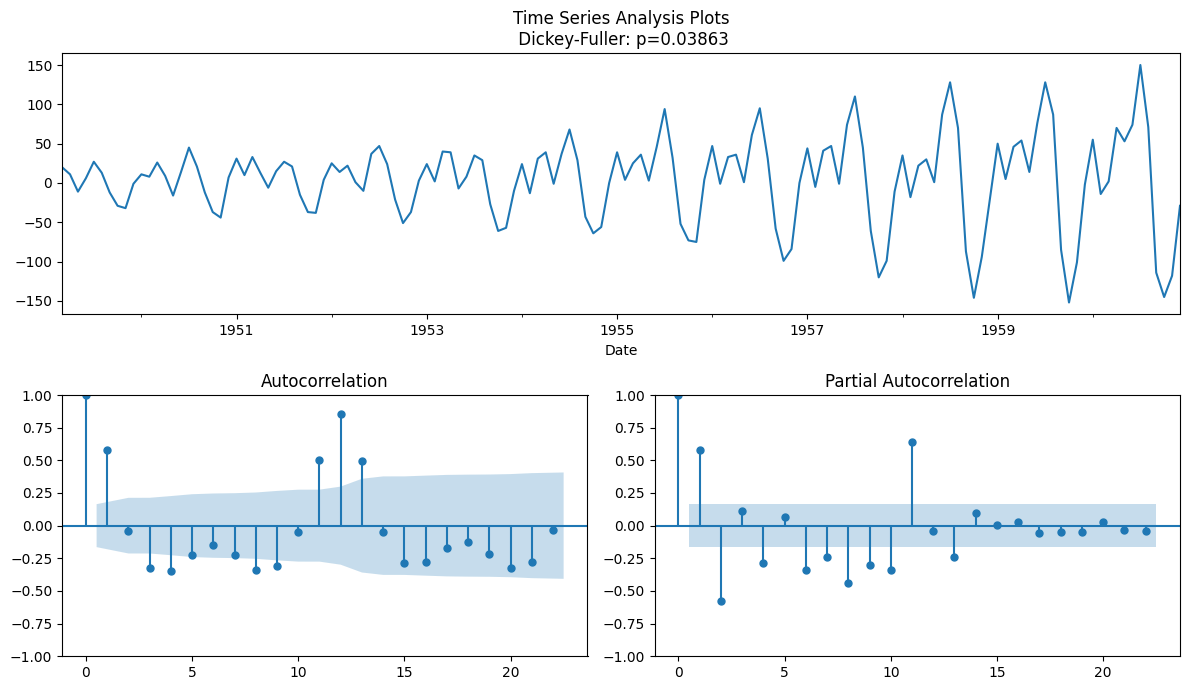

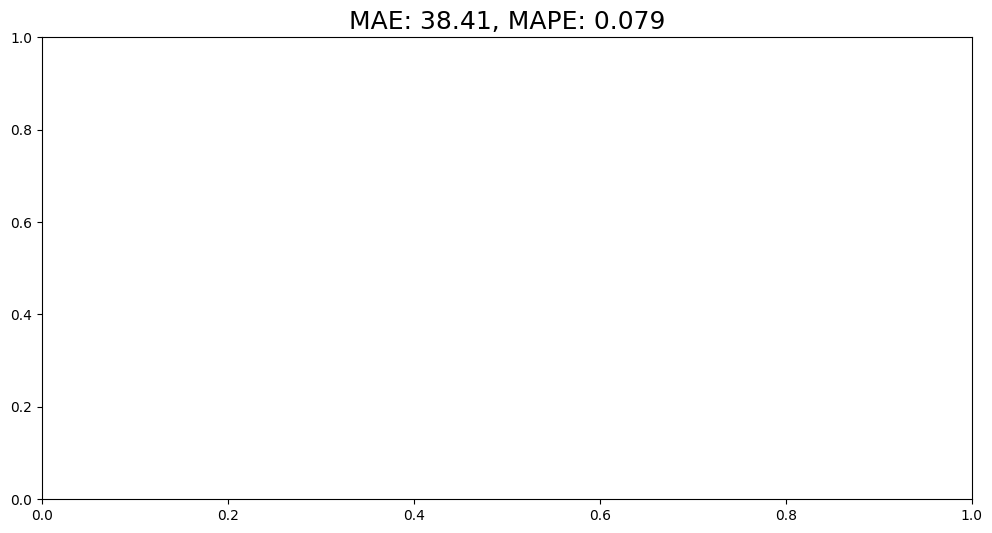

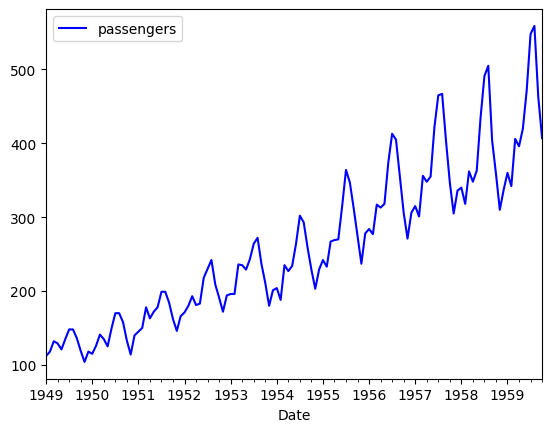

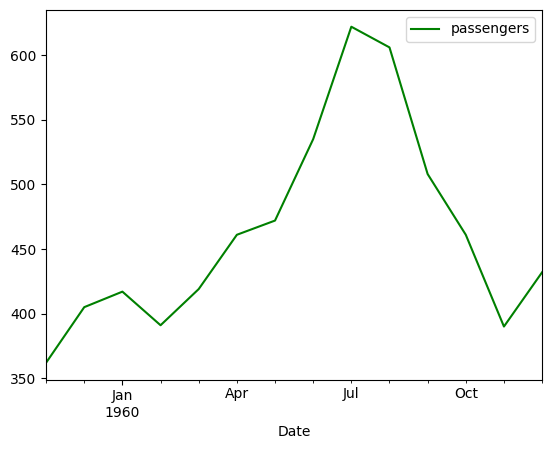

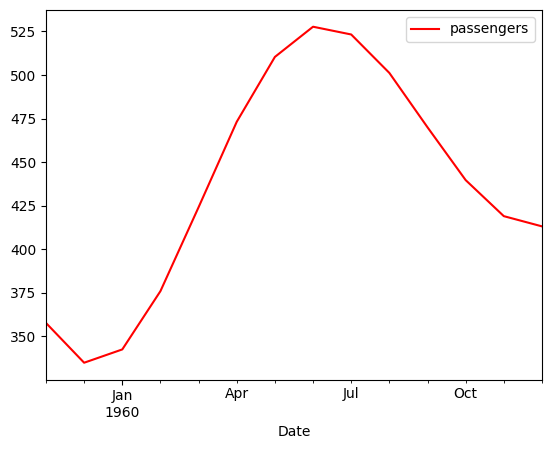

In [3]:
import statsmodels.api as sm
import warnings
import statsmodels.tsa.api as smt
from sktime.forecasting.arima import AutoARIMA
import pmdarima
import pandas as pd
import matplotlib.pyplot as plt  # Add import for matplotlib
from sktime.utils.plotting import plot_series

# Load data
data5c = pd.read_csv("question5b.csv", header=None)
col_name_years = list(data5c.values.ravel())
data5a = pd.read_csv("question5a.csv", names=col_name_years)
data5b = pd.read_csv("question5c.csv", names=["months"])
data5 = pd.concat([data5a, data5b], axis=1)
new_data5 = pd.melt(data5, id_vars=["months"], value_vars=list(data5.columns[:-1]), value_name="passengers")
dates = pd.date_range(start='1949-01-01', freq='M', periods=len(new_data5))
new_data5['Date'] = dates
new_data5.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 8))
new_data5["passengers"].plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Decomposition
decompose = sm.tsa.seasonal_decompose(new_data5.passengers, model='multiplicative', extrapolate_trend=8)
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')


def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    
tsplot(new_data5.passengers)

# Differencing
ts_sun_diff = (new_data5["passengers"] - new_data5["passengers"].shift(1)).dropna()
tsplot(ts_sun_diff)

ts_sun_diff2 = (new_data5["passengers"] - new_data5["passengers"].shift(2)).dropna()
tsplot(ts_sun_diff2)

# Train-test split
test_len = int(len(new_data5["passengers"]) * 0.10)
sun_train, sun_test = new_data5[["passengers"]].iloc[:-test_len], new_data5[["passengers"]].iloc[-test_len:]

# AutoARIMA forecasting
forecaster = AutoARIMA(start_p=2, max_p=9, suppress_warnings=True)
forecaster.fit(sun_train)
forecaster.summary()

# Plotting forecast
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


def plot_forecast(series_train, series_test, forecast, forecast_int=None):

    mae = mean_absolute_error(series_test, forecast)
    mape = mean_absolute_percentage_error(series_test, forecast)

    plt.figure(figsize=(12, 6))
    plt.title(f"MAE: {mae:.2f}, MAPE: {mape:.3f}", size=18)
    series_train.plot(label="train", color="b")
    series_test.plot(label="test", color="g")
    forecast.index = series_test.index
    forecast.plot(label="forecast", color="r")
    if forecast_int is not None:
        lower_col = f"lower {int(coverage * 100)}%"
        upper_col = f"upper {int(coverage * 100)}%"
        plt.fill_between(
            series_test.index,
            forecast_int[lower_col],
            forecast_int[upper_col],
            alpha=0.2,
            color="dimgray",
        )
    plt.legend(prop={"size": 16})
    plt.show()

    return mae, mape


# Forecast
fh = list(range(1, test_len + 1))
forecast = forecaster.predict(fh=fh)
coverage = 0.9  # confidence interval
forecast_int = forecaster.predict_interval(fh=fh, coverage=coverage)
sun_arima_mae, sun_arima_mape = plot_forecast(sun_train, sun_test, forecast, forecast_int)

# Original code...

# Plotting for illustration
plot_series(sun_train, sun_test, labels=["y_train", "y_test"])
print(sun_train.shape[0], sun_test.shape[0])

# Original code...



132 12


AssertionError: 

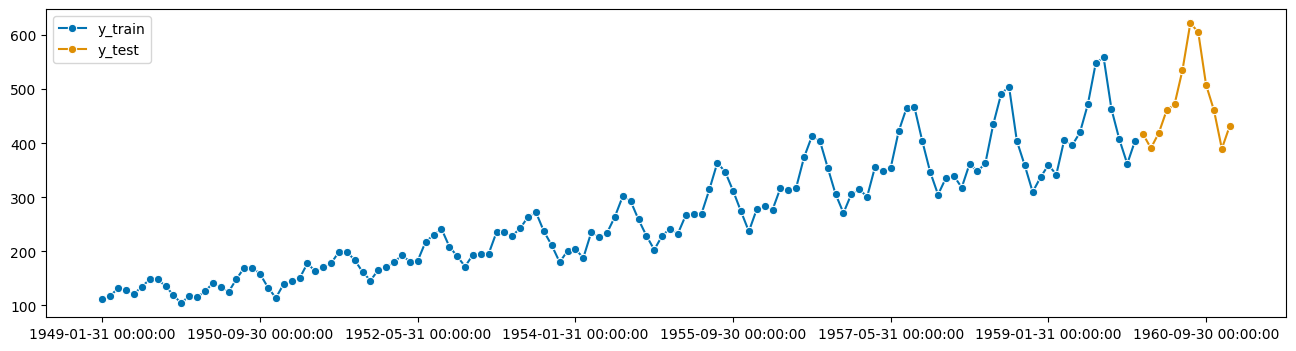

In [4]:
# Additional code:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

# Convert the index to a PeriodIndex with monthly frequency
ts_df = new_data5[["passengers"]]
ts_df.index = pd.PeriodIndex(ts_df.index, freq="M")

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(new_data5[["passengers"]], test_size=12)

# Plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

# Define the forecasting horizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=12, freq="M")), is_relative=False
)

# Another way to define the forecasting horizon using the test set index
# fh = ForecastingHorizon(y_test.index, is_relative=False)

# Create and fit the AutoARIMA model
forecaster = AutoARIMA(start_p=2, max_p=9, suppress_warnings=True)
forecaster.fit(y_train)

# Make predictions on the test set
y_pred = forecaster.predict(fh=fh)

# Plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])



In [3]:


# Function for time series analysis plots
def tsplot(y, lags=None, figsize=(12, 7)):
    # ... (unchanged)



def plot_forecast(series_train, series_test, forecast, forecast_int=None):
    # ... (unchanged)



,0,1,2,3,4,5,6,7,8,9,10,11
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [4]:
data2

,0
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [5]:
data3.T

,0,1,2,3,4,5,6,7,8,9,10,11
months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


In [6]:
import pandas as pd

# Concatenate along rows
result_df = pd.concat([data3.T, data1.T], ignore_index=False)

# Display the result
print(result_df)


         0    1    2    3    4    5    6    7    8    9    10   11
months  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1949    112  118  132  129  121  135  148  148  136  119  104  118
1950    115  126  141  135  125  149  170  170  158  133  114  140
1951    145  150  178  163  172  178  199  199  184  162  146  166
1952    171  180  193  181  183  218  230  242  209  191  172  194
1953    196  196  236  235  229  243  264  272  237  211  180  201
1954    204  188  235  227  234  264  302  293  259  229  203  229
1955    242  233  267  269  270  315  364  347  312  274  237  278
1956    284  277  317  313  318  374  413  405  355  306  271  306
1957    315  301  356  348  355  422  465  467  404  347  305  336
1958    340  318  362  348  363  435  491  505  404  359  310  337
1959    360  342  406  396  420  472  548  559  463  407  362  405
1960    417  391  419  461  472  535  622  606  508  461  390  432


In [7]:
# Relabel the columns
result_df.columns = df.iloc[0, :].tolist()

# Drop the original row with month names
result_df = result_df.drop(0)

# Reset the index
result_df = result_df.reset_index(drop=True)

# Display the updated DataFrame
print(result_df)

KeyError: '[0] not found in axis'

In [ ]:
data4

In [ ]:
# Transpose the DataFrame
transposed_df = data4.melt(var_name='month', value_name='passengers')

# Add the 'year' column
transposed_df['year'] = transposed_df.index + 1949

# Display the result
print(transposed_df)

In [ ]:
transposed_df

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'year', 'month', and 'passengers'
# If not, you need to load or prepare your dataset accordingly

# Filter data for the years 1949 to 1960
train_data = data4[(data4['year'] >= 1949) & (data4['year'] <= 1960)]

# Select features (X) and target variable (y)
X = train_data[['year', 'month']]
y = train_data['passengers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the number of passengers for Jan to Dec 1961
prediction_data = pd.DataFrame({'year': [1961] * 12, 'month': range(1, 13)})
predicted_passengers = model.predict(prediction_data)

# Plot the predictions
plt.plot(df['months'], df['passengers'], label='Actual Passengers')
plt.plot(range(145, 157), predicted_passengers, label='Predicted Passengers', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Number of Airline Passengers')
plt.legend()
plt.show()


In [ ]:
print(data4.columns)
